In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/cars_ads.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.shape

(3552912, 16)

In [ ]:
data.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [ ]:
data.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'body_type', 'color_slug', 'stk_year', 'transmission',
       'door_count', 'seat_count', 'fuel_type', 'date_created',
       'date_last_seen', 'price_eur'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             object 
 9   transmission         object 
 10  door_count           object 
 11  seat_count           object 
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


In [ ]:
data.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


In [ ]:
data.nunique()

maker                       46
model                     1012
mileage                 248142
manufacture_year          1640
engine_displacement       7272
engine_power               641
body_type                    9
color_slug                  14
stk_year                   298
transmission                 2
door_count                  26
seat_count                  88
fuel_type                    5
date_created           3552912
date_last_seen         3355057
price_eur               227305
dtype: int64

### Inference
The dataset is composed of **16 columns and 3552912 rows**. There are **5 floating attributes and 11 object type** attributes. 

The dataset is composed of **46 unique makers and 1012 unique models**

## **Correlation among attributes**

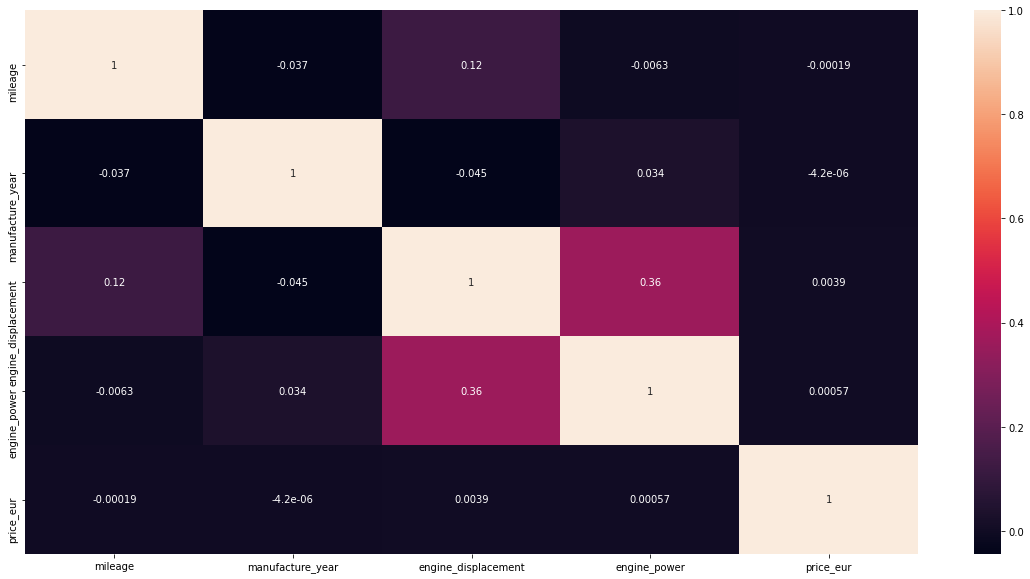

In [ ]:
corr = data.corr()
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(corr, annot=True)

In [ ]:
corr

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
mileage,1.000000,-0.037207,0.121294,-0.006331,-0.000188
manufacture_year,-0.037207,1.000000,-0.044598,0.033741,-0.000004
engine_displacement,0.121294,-0.044598,1.000000,0.363279,0.003932
engine_power,-0.006331,0.033741,0.363279,1.000000,0.000573
price_eur,-0.000188,-0.000004,0.003932,0.000573,1.000000


### Inference
We can see that there is certain correlation between the engine power and engine displacement

## **Missing Values**

In [ ]:
data.isnull().any()

maker                   True
model                   True
mileage                 True
manufacture_year        True
engine_displacement     True
engine_power            True
body_type               True
color_slug              True
stk_year                True
transmission            True
door_count              True
seat_count              True
fuel_type               True
date_created           False
date_last_seen         False
price_eur              False
dtype: bool

Except for date_created, date_last_seen and price_eur all attributes consist of missing values

In [ ]:
data.isnull().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

In [ ]:
percentage = (data.isnull().sum()*100)/len(data)

In [ ]:
percentage

maker                  14.605343
model                  31.899495
mileage                10.205263
manufacture_year       10.430261
engine_displacement    20.924076
engine_power           15.617527
body_type              31.605455
color_slug             94.103400
stk_year               48.077633
transmission           20.873863
door_count             17.292097
seat_count             21.095062
fuel_type              52.002583
date_created            0.000000
date_last_seen          0.000000
price_eur               0.000000
dtype: float64

We can see that **94 percent** of entries of **color_slug** and **48 percent** of **stk_year** is missing which very large portion hence we can drop them. 

In [ ]:
data.drop(['color_slug','stk_year'], axis =1, inplace=True )

In [ ]:
data.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [ ]:
data.dropna()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
507,mercedes-benz,viano,203593.0,2011.0,2143.0,120.0,van,man,5,5,diesel,2015-11-14 18:55:33.799132+00,2016-01-27 20:40:15.46361+00,22168.76
898,ford,s-max,137316.0,2011.0,2000.0,103.0,van,man,5,5,diesel,2015-11-14 18:55:47.920819+00,2016-01-27 20:40:15.46361+00,9437.45
1007,hyundai,matrix,182000.0,2002.0,1795.0,90.0,van,man,5,5,gasoline,2015-11-14 18:55:52.585478+00,2016-01-27 20:40:15.46361+00,1073.28
1079,chrysler,town-country,122800.0,2012.0,3604.0,214.0,van,auto,5,7,gasoline,2015-11-14 18:55:55.292768+00,2016-01-27 20:40:15.46361+00,18467.80
1603,fiat,doblo,155623.0,2006.0,1910.0,77.0,van,man,4,5,diesel,2015-11-14 18:56:16.320942+00,2016-01-27 20:40:15.46361+00,3515.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550257,audi,a4,153000.0,2001.0,1984.0,96.0,sedan,man,4,5,gasoline,2017-03-16 17:09:55.702407+00,2017-03-16 17:09:55.702407+00,1295.34
3550258,citroen,c3,151433.0,2008.0,1360.0,54.0,coupe,man,5,5,gasoline,2017-03-16 17:09:56.081033+00,2017-03-16 17:09:56.081033+00,1295.34
3550261,fiat,stilo,210000.0,2002.0,1910.0,85.0,coupe,man,5,5,diesel,2017-03-16 17:09:56.716305+00,2017-03-16 17:09:56.716305+00,1295.34
3550264,volkswagen,passat,183589.0,2006.0,1968.0,103.0,stationwagon,auto,5,5,diesel,2017-03-16 17:09:57.650801+00,2017-03-16 17:09:57.650801+00,1295.34


### Inference
In case if we removed all the entries containing missing values only 128165 rows retains out of 3552912.  That means a large portion od data is lost hence we must try handle missing values using some other tchniques of imputations

In [ ]:
data['body_type'].unique()

array([nan, 'van', 'compact', 'transporter', 'coupe', 'convertible',
       'other', 'sedan', 'stationwagon', 'offroad'], dtype=object)

In [ ]:
data['body_type'].fillna('unknown', inplace=True)

In [ ]:
data.dropna()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,unknown,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,unknown,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,unknown,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,unknown,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71
5,skoda,fabia,140932.0,2003.0,1200.0,40.0,unknown,man,5,5,gasoline,2015-11-14 18:10:06.894643+00,2016-01-27 20:40:15.46361+00,1628.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550257,audi,a4,153000.0,2001.0,1984.0,96.0,sedan,man,4,5,gasoline,2017-03-16 17:09:55.702407+00,2017-03-16 17:09:55.702407+00,1295.34
3550258,citroen,c3,151433.0,2008.0,1360.0,54.0,coupe,man,5,5,gasoline,2017-03-16 17:09:56.081033+00,2017-03-16 17:09:56.081033+00,1295.34
3550261,fiat,stilo,210000.0,2002.0,1910.0,85.0,coupe,man,5,5,diesel,2017-03-16 17:09:56.716305+00,2017-03-16 17:09:56.716305+00,1295.34
3550264,volkswagen,passat,183589.0,2006.0,1968.0,103.0,stationwagon,auto,5,5,diesel,2017-03-16 17:09:57.650801+00,2017-03-16 17:09:57.650801+00,1295.34


## Filling missing values 

In [ ]:
data['mileage'].fillna(data['mileage'].median(), inplace=True)
data['model'].fillna(data['model'].mode()[0], inplace=True)
data['engine_displacement'].fillna(data['engine_displacement'].mean(), inplace=True)

In [ ]:
data.isnull().any()

maker                   True
model                  False
mileage                False
manufacture_year        True
engine_displacement    False
engine_power            True
body_type              False
transmission            True
door_count              True
seat_count              True
fuel_type               True
date_created           False
date_last_seen         False
price_eur              False
dtype: bool

Now after imputation of certain values we still have missing values. Lets remove the rows which contains more than 3 missing values

In [ ]:
data.drop(data[(data.isnull().sum(axis=1)>3)].index, inplace=True)

In [ ]:
data.shape

(3127200, 14)

We can see that the loss of data is very less in comparison to that of before imputation

In [ ]:
data.isnull().any()

maker                   True
model                  False
mileage                False
manufacture_year        True
engine_displacement    False
engine_power            True
body_type              False
transmission            True
door_count              True
seat_count              True
fuel_type               True
date_created           False
date_last_seen         False
price_eur              False
dtype: bool

In [ ]:
data['manufacture_year'].fillna(data['manufacture_year'].value_counts().index[0], inplace=True)
data['transmission'].fillna(data['transmission'].value_counts().index[0], inplace=True)
data['maker'].fillna(data['maker'].value_counts().index[0], inplace=True)

data['engine_power'].fillna(data['engine_power'].median(), inplace=True)
data['fuel_type'].fillna(data['fuel_type'].value_counts().index[0], inplace=True)


In [ ]:
data.isnull().any()

maker                  False
model                  False
mileage                False
manufacture_year       False
engine_displacement    False
engine_power           False
body_type              False
transmission           False
door_count              True
seat_count              True
fuel_type              False
date_created           False
date_last_seen         False
price_eur              False
dtype: bool

## **Variable Transformation(Log Transformation)**

In [ ]:
new_data =data.copy()

### Mileage

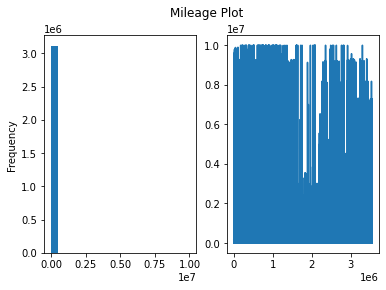

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Mileage Plot')
data['mileage'].plot.hist(ax=axes[0], bins=20)
data['mileage'].plot(ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


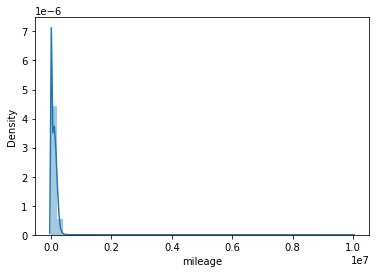

In [ ]:
sns.distplot(data['mileage'])

We can see that above attributes have a lot of the data in lower values and some of the values at higer range. Hence these values can be log transformed to achieve better distribution

In [ ]:
new_data['mileage']= np.log(data['mileage'][data['mileage']>0])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


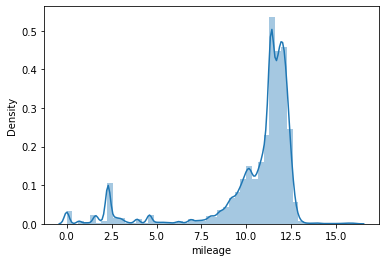

In [ ]:
sns.distplot(new_data['mileage'])

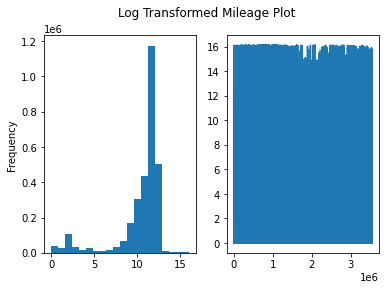

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Log Transformed Mileage Plot')
new_data['mileage'].plot.hist(ax=axes[0], bins=20)
new_data['mileage'].plot(ax=axes[1])

### Inference
After log transformation the distribution has spreaded hence it prevents the bias.

### Engine Displacement

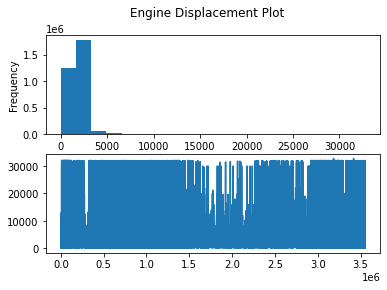

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Engine Displacement Plot')
data['engine_displacement'].plot.hist(ax=axes[0], bins=20)
data['engine_displacement'].plot(ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


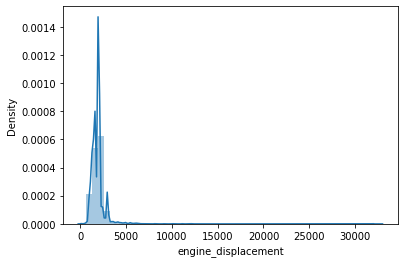

In [ ]:
sns.distplot(data['engine_displacement'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


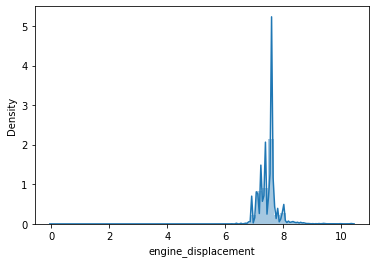

In [ ]:
new_data['engine_displacement']= np.log(data['engine_displacement'][data['engine_displacement']>0])
sns.distplot(new_data['engine_displacement'])

## Engine Power

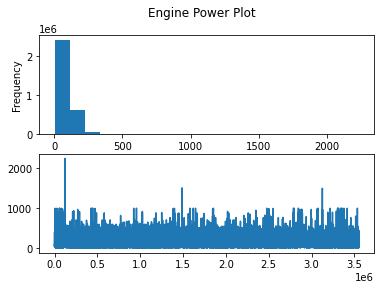

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Engine Power Plot')
data['engine_power'].plot.hist(ax=axes[0], bins=20)
data['engine_power'].plot(ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


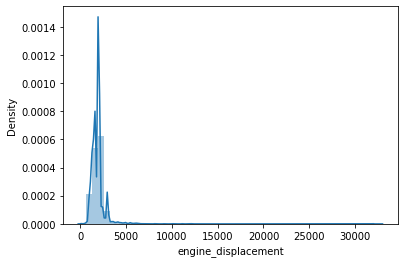

In [ ]:
sns.distplot(data['engine_displacement'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


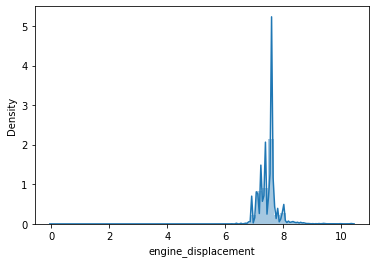

In [ ]:
new_data['engine_displacement']= np.log(data['engine_displacement'][data['engine_displacement']>0])
sns.distplot(new_data['engine_displacement'])

## **Outlier Handling**

### Door count

In [ ]:
new_data['door_count'].unique()

array(['5', '3', '4', 'None', '2', '6', '1', '7', nan, 5.0, 4.0, 3.0, 2.0,
       6.0, 1.0, 9.0, 7.0, 8.0, 77.0, 54.0, 0.0, 55.0, 22.0, 45.0, 17.0,
       49.0, 58.0], dtype=object)

In [ ]:
new_data['door_count'].replace('None', np.NaN, inplace=True)
new_data['door_count'] = new_data['door_count'].astype(float)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


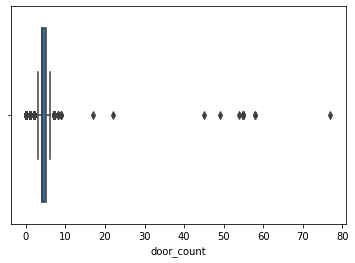

In [ ]:
sns.boxplot(new_data['door_count'])

We can see that the door count greater than 10 can be considered as the outliers hence we can remove them

In [ ]:
new_data.drop(new_data[new_data['door_count'] > 10].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


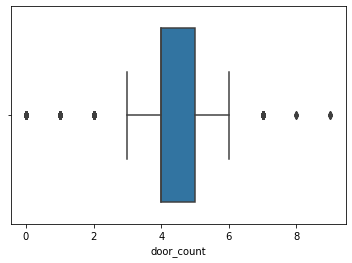

In [ ]:
sns.boxplot(new_data['door_count'])

In [ ]:
new_data['door_count'].unique()

array([ 5.,  3.,  4., nan,  2.,  6.,  1.,  7.,  9.,  8.,  0.])

### Seat count

In [ ]:
new_data['seat_count'].unique()

array(['7', '5', '4', 'None', '6', '9', '8', '2', '3', '1', '18', '20',
       '10', '11', '15', '12', '16', '14', '50', '17', '74', '65', '19',
       '54', '13', '27', '45', '24', '56', '22', '255', '23', '57', '25',
       nan, 5.0, 3.0, 4.0, 2.0, 7.0, 8.0, 6.0, 9.0, 23.0, 1.0, 51.0, 12.0,
       15.0, 14.0, 55.0, 19.0, 61.0, 21.0, 13.0, 17.0, 20.0, 10.0, 11.0,
       18.0, 45.0, 27.0, 53.0, 26.0, 56.0, 58.0, 25.0, 30.0, 36.0, 54.0,
       24.0, 16.0, 57.0, 74.0, 50.0, 0.0, 29.0, 52.0, 32.0, 44.0, 512.0,
       33.0, 515.0, 59.0, 85.0, 517.0, 81.0, 43.0, 49.0, 138.0],
      dtype=object)

In [ ]:
new_data['seat_count'].replace('None', np.NaN, inplace=True)
new_data['seat_count'] = new_data['seat_count'].astype(float)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


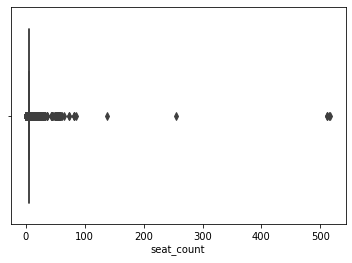

In [ ]:
sns.boxplot(new_data['seat_count'])

Lets remove seat count greater than 100 and see the amount of outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


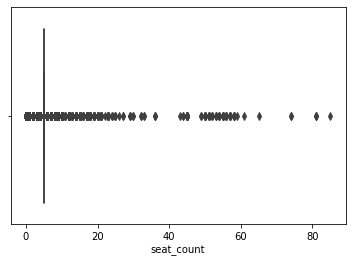

In [ ]:
new_data.drop(new_data[new_data['seat_count'] > 100].index, inplace =True)
sns.boxplot(new_data['seat_count'])

The presence of outlier can still be seen hence we can further filter the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


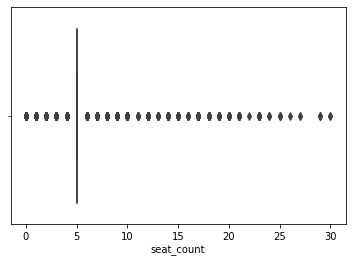

In [ ]:
new_data.drop(new_data[new_data['seat_count'] >30].index, inplace =True)
sns.boxplot(new_data['seat_count'])

### Price_eur

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


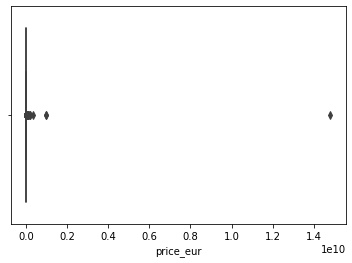

In [ ]:
sns.boxplot(new_data['price_eur'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


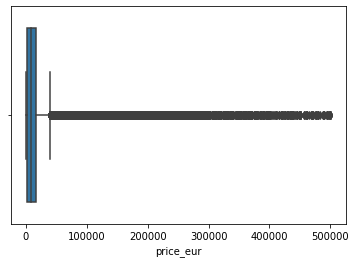

In [ ]:
new_data.drop(new_data[new_data['price_eur'] >5e5].index, inplace =True)
sns.boxplot(new_data['price_eur'])

In [ ]:
new_data['door_count'].fillna((new_data['door_count'].mean()), inplace=True)
new_data['seat_count'].fillna((new_data['seat_count'].mean()), inplace=True)

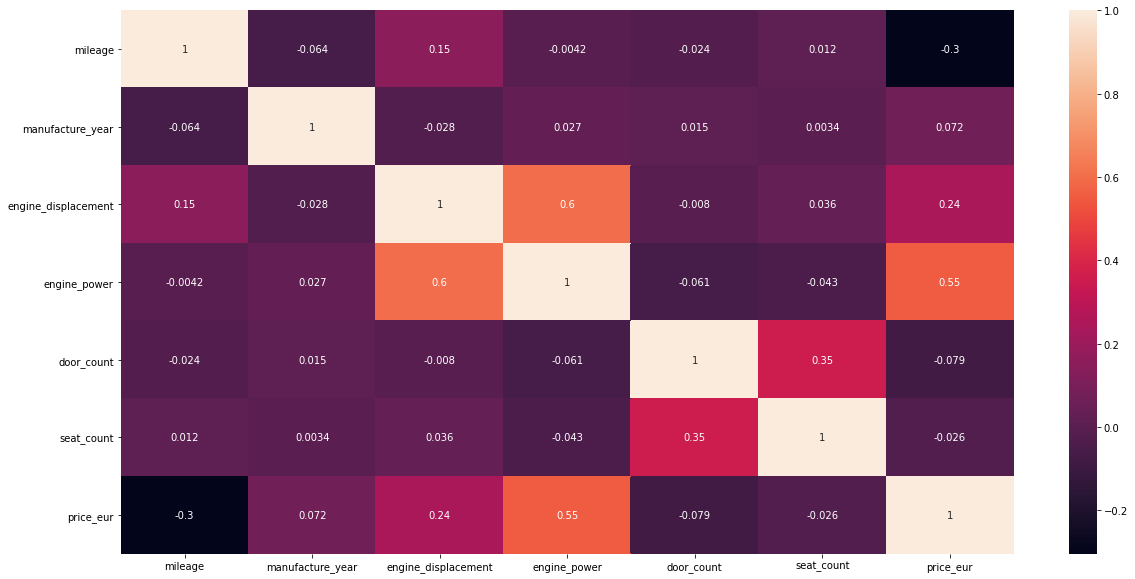

In [ ]:
new_corr = new_data.corr()
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(new_corr, annot=True)

After the handling of missing values and outlier rejections the correlation matrix is as above. The correlation between engine power and engine displacement has increased.
We can also infer that the **price** is mostly correlated to the **engine power**

## **Visualisation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


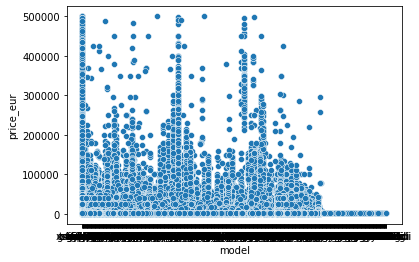

In [ ]:
sns.scatterplot(new_data['model'], new_data['price_eur'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


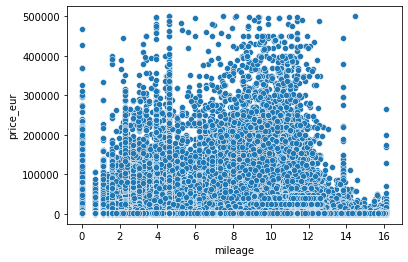

In [ ]:
sns.scatterplot(new_data['mileage'], new_data['price_eur'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


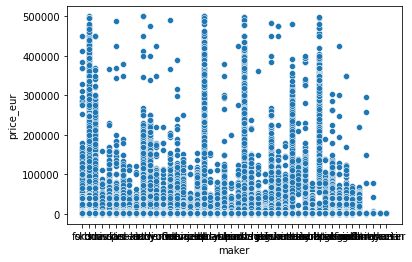

In [ ]:
sns.scatterplot(new_data['maker'], new_data['price_eur'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


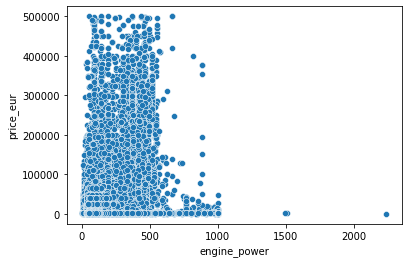

In [ ]:
sns.scatterplot(new_data['engine_power'], new_data['price_eur'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


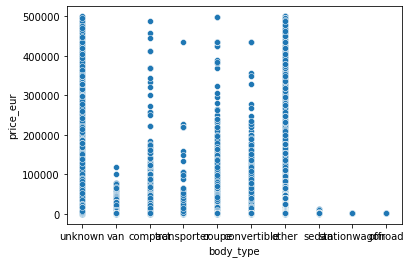

In [ ]:
sns.scatterplot(new_data['body_type'], new_data['price_eur'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


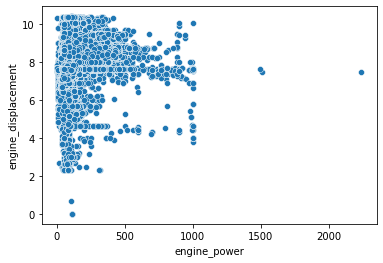

In [ ]:
sns.scatterplot(new_data['engine_power'], new_data['engine_displacement'])